# Egyptian Real State Market Analysis
This project presents a comprehensive Exploratory Data Analysis (EDA) of the Egyptian real estate market. Its aim is to explore the underlying patterns within the dataset, uncover key trends, and generate actionable insights that enhance our understanding of the market landscape.

It will involve data cleaning, exploration, and visualization to reveal meaningful insights.


____

## 1. Importing Libraries
We begin by importing the essential libraries required for data manipulation, visualization, and exploratory analysis.

The following libraries are utilized throughout the EDA process to support data manipulation, visualization, and diagnostics:
- **Re (`re`)** → Search, extract, clean, and manipulate text using patterns.
- **Pandas (`pandas`)** → Used for loading, cleaning, transforming, and analyzing structured (tabular) data.  
- **NumPy (`numpy`)** → Provides efficient numerical operations, array manipulation, and mathematical utilities.  
- **Matplotlib (`matplotlib.pyplot`)** → Offers foundational tools for creating static visualizations and custom plots.  
- **Seaborn (`seaborn`)** → Built on top of Matplotlib and provides high-level, visually appealing statistical visualizations.  
- **Missingno (`missingno`)** → Useful for visualizing missing values and understanding data completeness patterns.


In [1]:
# Importing libraries
import re 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import sklearn
sns.set_style('whitegrid')  # Setting seaborn style to whitegrid 

____

## 2. Loading the Dataset

In this step, we load the dataset into a copied DataFrame using the `pandas` library to ensure the original raw data remains preserved throughout the analysis.

**Dataset Source:**  
Egyptian Real Estate Listings — created by *Hassan Khaled*:  
https://www.kaggle.com/datasets/hassankhaled21/egyptian-real-estate-listings


In [2]:
df = pd.read_csv("data\\egypt_real_estate_listings.csv")   # whatever you use
raw_df = df.copy()                  # backup of raw data


## Data Dictionary

| Column            | Description |
|-------------------|-------------|
| `url`             | Direct link to the property listing on PropertyFinder Egypt. |
| `price`           | Property price in Egyptian Pounds (string, includes comma separators). |
| `description`     | Detailed property description (English/Arabic mixed text). |
| `location`        | Full location including compound, city, and governorate. |
| `type`            | Property type (Apartment, Villa, Townhouse, etc.). |
| `size`            | Property size in both square feet and square meters. |
| `bedrooms`        | Number of bedrooms (numeric or string, e.g., "3+ Maid"). |
| `bathrooms`       | Number of bathrooms. |
| `available_from`  | Availability date for the property (nullable). |
| `payment_method`  | Payment method (e.g., Cash, Installments). |
| `down_payment`    | Down payment amount (available for ~5k listings). |


____

## 3. Initial Data Exploration

To understand the structure and characteristics of the data, we use the following functions:

* **Shape (`df.shape`)** → Returns the number of rows (observations) and columns (features).
* **Columns (`df.columns`)** → Lists all available variables in the dataset.
* **Info (`df.info()`)** → Provides data types, non-null counts, and memory usage details.
* **Statistical Summary (`df.describe().T`)** → Generates descriptive statistics (mean, standard deviation, minimum, maximum, etc.) for numerical features.
* **Preview (`df.head()`)** → Displays the first five records for an initial overview of the dataset.


In [3]:
# Shows number of Rows and Columns 
df.shape

(19924, 11)

In [4]:
# Lists all Features (Columns)
df.columns

Index(['url', 'price', 'description', 'location', 'type', 'size', 'bedrooms',
       'bathrooms', 'available_from', 'payment_method', 'down_payment'],
      dtype='object')

In [5]:
# Showing data types and non-null count in every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19924 entries, 0 to 19923
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             19924 non-null  object
 1   price           19385 non-null  object
 2   description     19846 non-null  object
 3   location        19833 non-null  object
 4   type            19847 non-null  object
 5   size            19847 non-null  object
 6   bedrooms        19780 non-null  object
 7   bathrooms       19784 non-null  object
 8   available_from  19261 non-null  object
 9   payment_method  19383 non-null  object
 10  down_payment    5445 non-null   object
dtypes: object(11)
memory usage: 1.7+ MB


In [6]:
# Shows Statistical Informations
df.describe().T

,count,unique,top,freq
url,19924,19924,https://www.propertyfinder.eg/en/plp/buy/chale...,1
price,19385,4286,"10,000,000",307
description,19846,18130,Please Note Before Reading:\nThis is one of ma...,72
location,19833,1535,"Marassi, Sidi Abdel Rahman, North Coast",433
type,19847,17,Apartment,8355
size,19847,683,"1,507 sqft / 140 sqm",432
bedrooms,19780,18,3,4959
bathrooms,19784,16,3,6562
available_from,19261,353,1 Sep 2025,3254
payment_method,19383,2,Cash,15521


In [7]:
# Showing the first 5 and last rows
df

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP"
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP"
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP"
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP"
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP"
...,...,...,...,...,...,...,...,...,...,...,...
19919,https://www.propertyfinder.eg/en/plp/buy/chale...,"10,500,000",Code: 2404\nChalet for sale in North Edge Towe...,"North Edge Towers, New Alamein City, Al Alamei...",Chalet,"1,259 sqft / 117 sqm",2,2,21 Aug 2025,Cash,NaN
19920,https://www.propertyfinder.eg/en/plp/buy/duple...,"24,000,000",Duplex for sale in Eastown -Sodic\n5th settlem...,"Eastown, 5th Settlement Compounds, The 5th Set...",Duplex,"2,756 sqft / 256 sqm",3+ Maid,4,1 Sep 2025,Cash,NaN
19921,https://www.propertyfinder.eg/en/plp/buy/chale...,"3,000,000",Chalet for Sale in One of the Prime Projects o...,"White Sand, Markaz Al Hamam, North Coast",Chalet,"1,195 sqft / 111 sqm",2,2,30 Jul 2025,Cash,NaN
19922,https://www.propertyfinder.eg/en/plp/buy/villa...,"9,500,000",Villa for sale in installments in Sarai Compou...,"Sarai, Mostakbal City Compounds, Mostakbal Cit...",Villa,"2,573 sqft / 239 sqm",5,4,23 Aug 2025,Cash,NaN


___

## 4. Missing Values Analysis

We start by creating a summary table that displays the percentage of missing values for each feature. Afterward, we visualize the distribution of missing data to better understand patterns of incompleteness and guide the data-cleaning process.

#### Missing Values Table

In [8]:
# Missing Values Table
missing_table = df.isnull().sum().to_frame(name='Missing Values').reset_index()
missing_table['Missing Percentage'] = (missing_table['Missing Values'] / df.shape[0] * 100).round(2)
missing_table[missing_table['Missing Values'] > 0]

,index,Missing Values,Missing Percentage
1,price,539,2.71
2,description,78,0.39
3,location,91,0.46
4,type,77,0.39
5,size,77,0.39
6,bedrooms,144,0.72
7,bathrooms,140,0.70
8,available_from,663,3.33
9,payment_method,541,2.72
10,down_payment,14479,72.67


#### Missing Values Visualization

<Axes: >

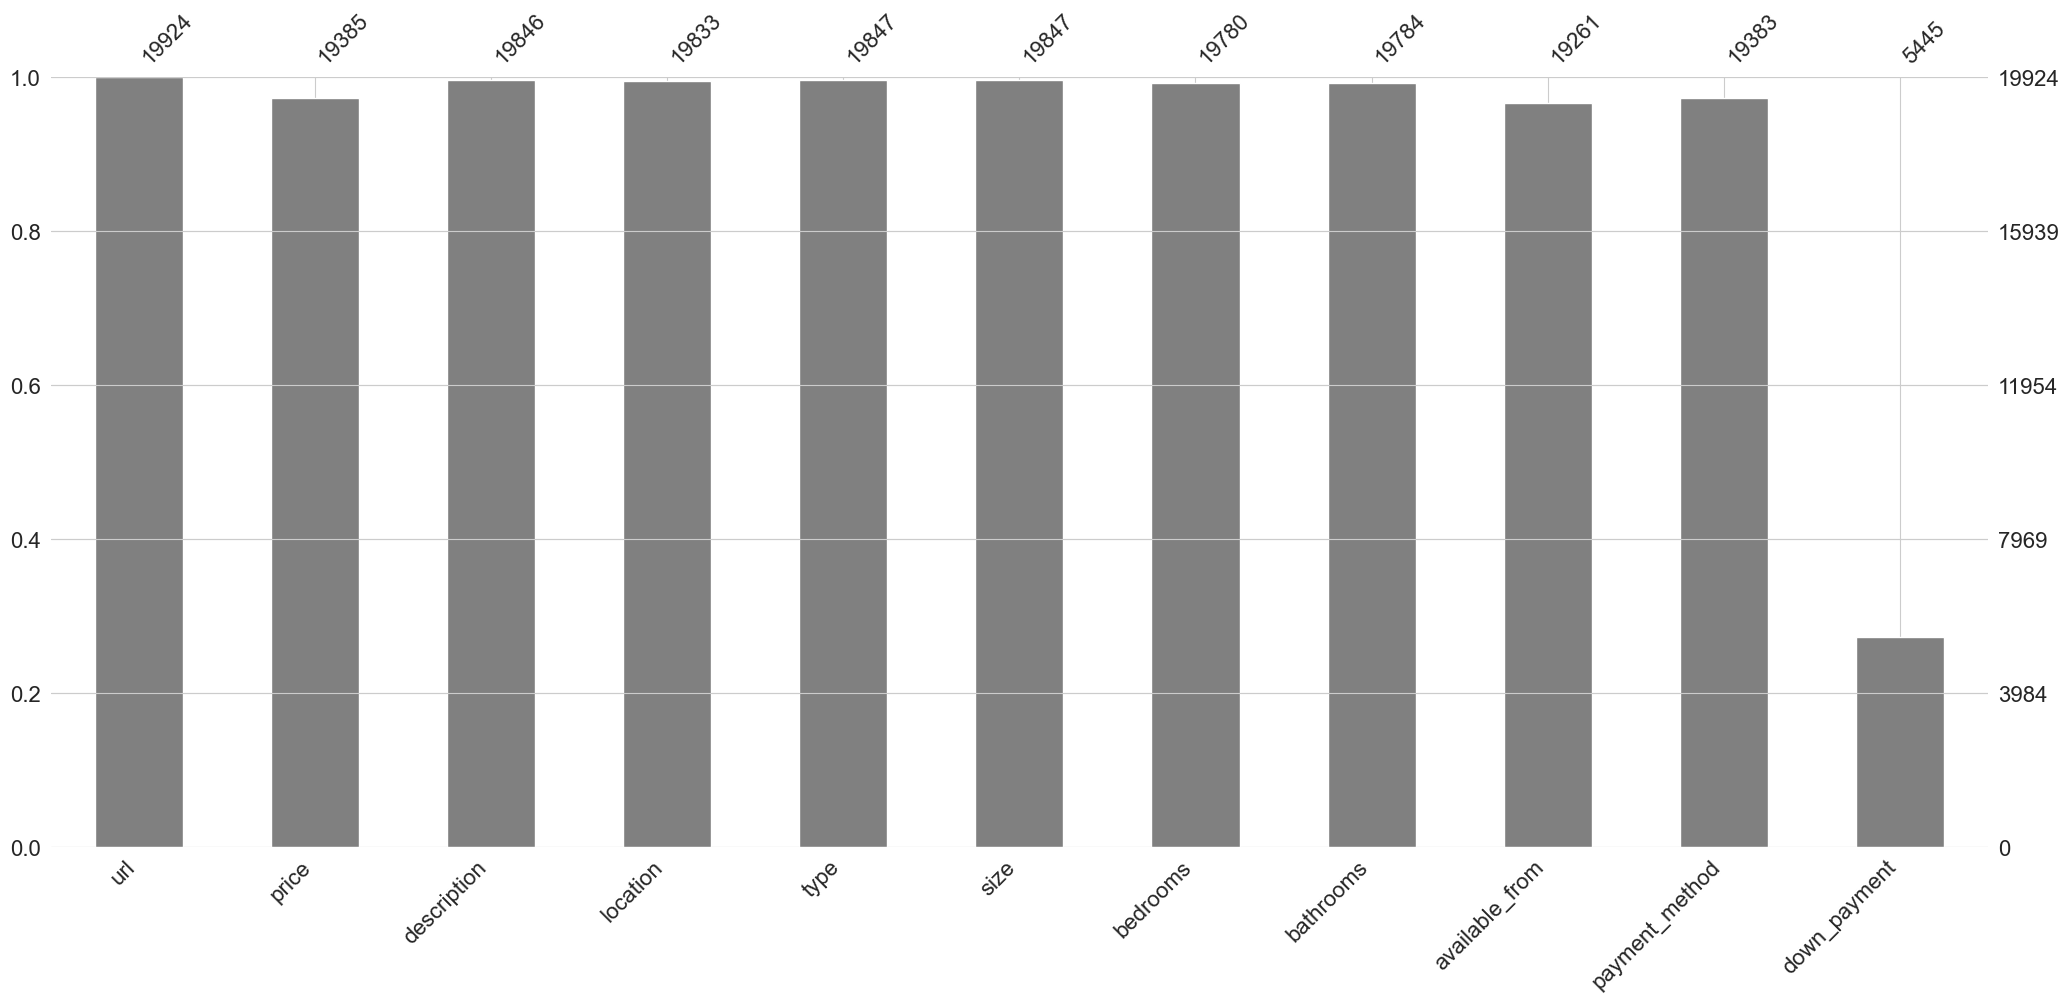

In [9]:
msno.bar(df, color='grey')

<Axes: >

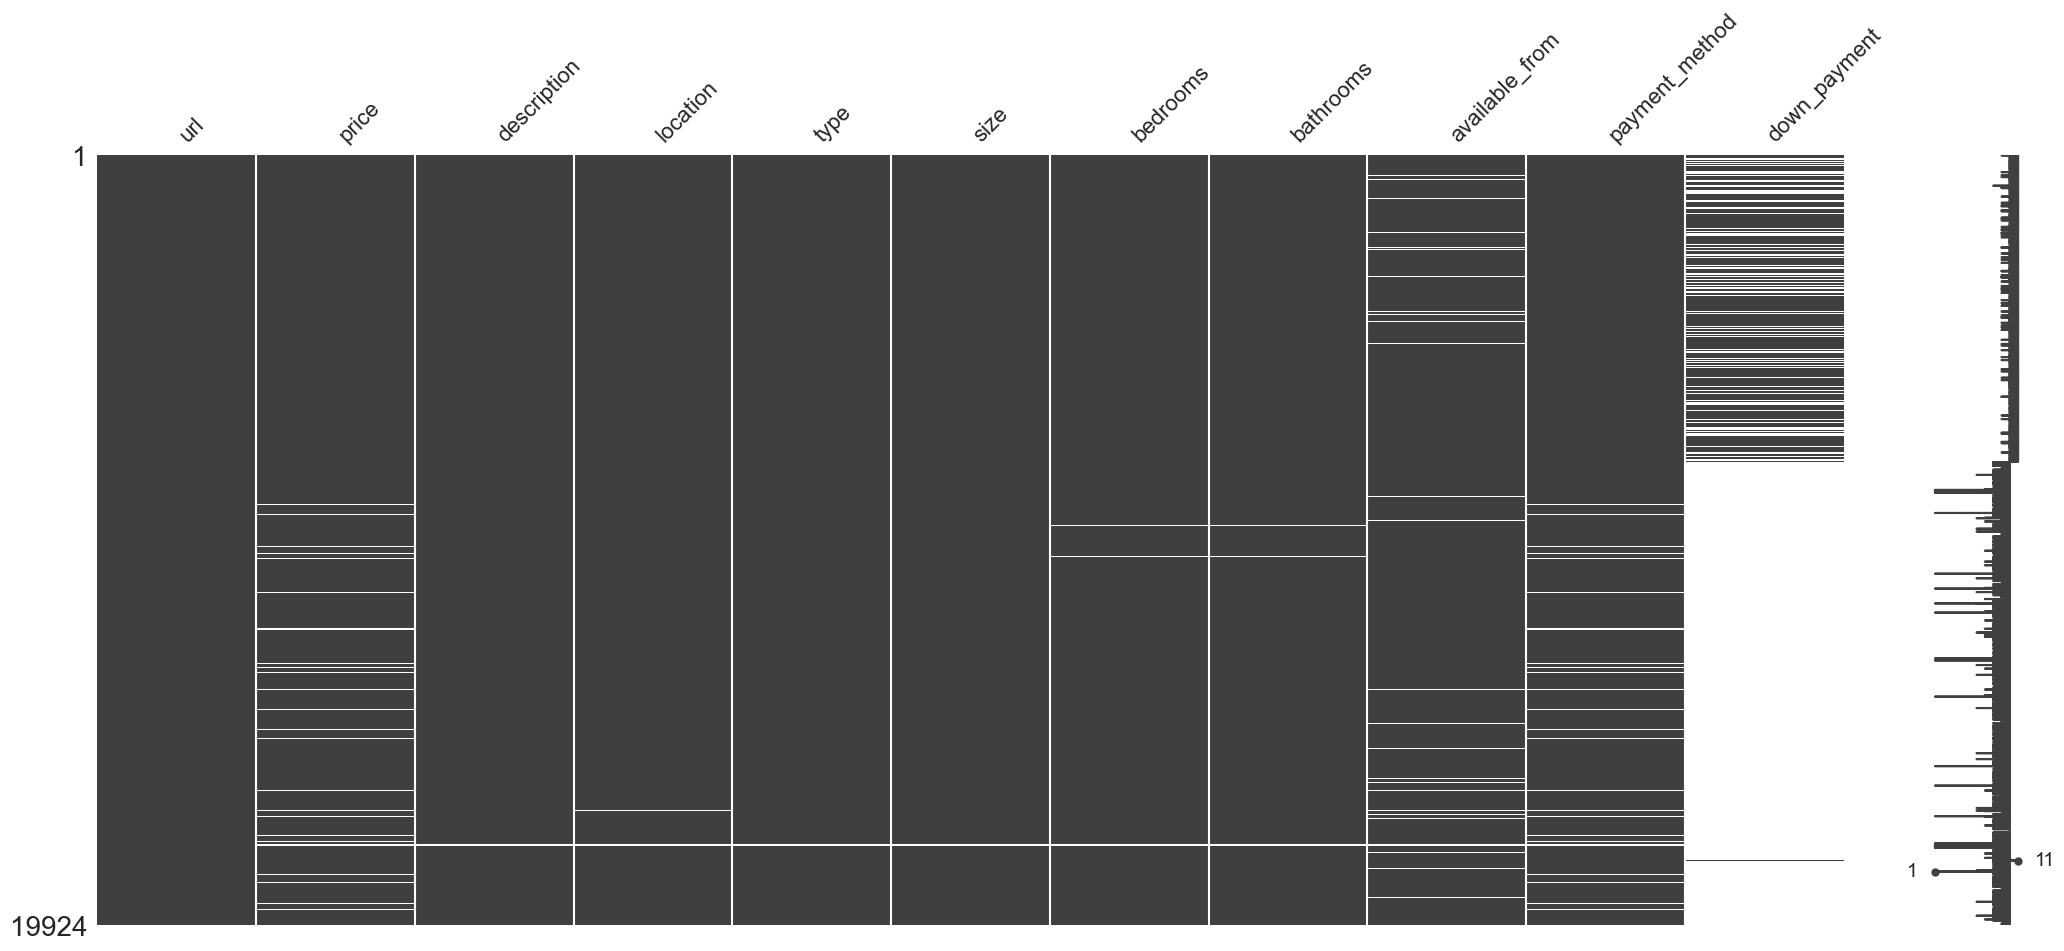

In [10]:
msno.matrix(df)

___

## 5. Data Cleaning, Preprocessing & Feature Engineering

Data cleaning and preprocessing are essential steps in preparing the dataset for analysis. This phase typically involves:

- Removing irrelevant or non-informative columns.
- Dropping rows with excessive or critical missing values.
- Converting columns to appropriate data types.
- Cleaning textual or numerical fields (e.g., removing commas from price values).
- Creating new features by extracting information from existing columns.
- Handling missing data through imputation techniques such as mean, median, or mode.


### 5.1 Dropping Useless Columns
We will drop these columns: 
- `url`: No statistical or analytical value and can't be used to group, aggregate, or visualize trends.
- `description`: Free text, noisy, often empty; skip for now unless doing NLP.
- `down_payment`: More than 70% is missing and it's not useful.
- `available_from`: Often inconsistent/missing; not helpful for pricing EDA.

And we will reset index

In [11]:

# Dropping unnecessary columns
df.drop(['description','available_from', 'url', 'down_payment'], axis=1, inplace=True)



In [12]:
# Resting index
df = df.reset_index(drop=True)

### 5.2 Dropping rows that contain missing values in any of the following essential columns:
- `Price` 
- `Location` 
- `Payment Method`

In [13]:
# Dropping rows with missing Price
df.dropna(subset=['price'], inplace=True)

# Dropping rows with missing Location
df.dropna(subset=['location'], inplace=True)

# Dropping rows with missing Payment Method
df.dropna(subset=['payment_method'], inplace=True)

### 5.3 Bedrooms Column:
- Cleaning the `bedrooms` column by removing the word "Maid" and creating a new binary feature `maid_room` (0 or 1).
- Converting studio units to a room count of 0.
- Converting the `bedrooms` column into a numeric data type.
- Filling missing values using the mode, as the percentage of missing data is only 0.33%.

In [14]:

# Handling bedrooms column

# 1. Creating maid room binary feature
df['maid_room'] = df['bedrooms'].str.contains('maid', case=False, na=False).astype(int)

# 2. Converting bedrooms to string for consistent processing
df['bedrooms'] = df['bedrooms'].astype(str).str.lower().str.strip()

# 3. Replacing any 'studio' and variants with 0
df['bedrooms'] = df['bedrooms'].replace(r'.*studio.*', '0', regex=True)

# 4. Removing anything related to "maid"
df['bedrooms'] = df['bedrooms'].str.replace(r'maid.*', '', regex=True)

# 5. Removing + signs
df['bedrooms'] = df['bedrooms'].str.replace(r'\+', '', regex=True)

# 6. Extracting the first number (Room count)
df['bedrooms'] = df['bedrooms'].str.extract(r'(\d+)')

# 7. Converting data type to numeric
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

# Filling missing values with the mode
bedrooms_mode = df['bedrooms'].mode()[0]
df['bedrooms'] = df['bedrooms'].fillna(bedrooms_mode)


### 5.4 Bathrooms Column
- Converting `bathrooms` column into a numeric data type.

In [15]:
# Converting data type to numeric
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')

# Filling missing values with the mode
bathroom_mode = df['bathrooms'].mode()[0]
df['bathrooms'] = df['bathrooms'].fillna(bathroom_mode)

### 5.5 Price Column
- Removing commas from the price.
- Converting it to numeric data type.
- Creating price bins based on quantiles to categorize properties into meaningful price ranges.
- Creating Price per square meter feature.

In [16]:
# Handling price column
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [17]:
# Creating price bins based on quantiles
df['price_bin'] = pd.qcut(df['price'], 
                          q=4, 
                          labels=['Low', 'Mid', 'High', 'Luxury'])

In [18]:
# Displaying price bins with their min and max values
df.groupby('price_bin', observed=False)['price'].agg(['min', 'max']).sort_index()


,min,max
price_bin,,
Low,186900,6000000
Mid,6000004,10344000
High,10345550,18154453
Luxury,18169000,840000000


In [19]:
# Creating price per square meter feature


### 5.6 Location Column
- Creating 3 new columns `compound` - `city` - `governorate` extracted from location and dropping it
- Converting data type to string

In [20]:
# Ensure location is string
df['location'] = df['location'].astype(str)

# Split the location into list parts
df['location_parts'] = df['location'].str.split(',')

# Extract compound = first element
df['compound'] = df['location_parts'].apply(
    lambda x: x[0].strip() if len(x) > 0 else None
).astype(str)

# Extract governorate = last element
df['governorate'] = df['location_parts'].apply(
    lambda x: x[-1].strip() if len(x) > 0 else None
).astype(str)

# Extract city = all middle elements joined together
df['city'] = df['location_parts'].apply(
    lambda x: ', '.join([p.strip() for p in x[1:-1]]) 
              if len(x) > 2 else 
              (x[1].strip() if len(x) == 2 else None)
).astype(str)

# Drop helper column and original location column
df = df.drop(columns=['location_parts', 'location'])

### 5.7 Size Column

- Creating size bins to categorize properties into meaningful size ranges.  
- Extracting and retaining only the square meter (sqm) value, as it is the standard unit commonly used in Egypt.

In [21]:
# --- Size Column Cleaning ---

# 1) Take the original raw size text
df['size_raw'] = raw_df['size'].astype(str)

# 2) Extract the sqm part (the part after "/")
df['size'] = (
    df['size_raw']
        .str.split('/').str[-1]                          # "... / 95 sqm" -> " 95 sqm"
        .str.replace('sqm', '', case=False, regex=False)
        .str.replace('m²', '', case=False, regex=False)  # just in case
        .str.replace(',', '', regex=False)
        .str.strip()
)

# 3) Convert to numeric (sqm)
df['size'] = pd.to_numeric(df['size'], errors='coerce')

print(df['size'].describe())


count    1.938300e+04
mean     1.034504e+03
std      1.135720e+05
min      1.000000e+00
25%      1.260000e+02
50%      1.700000e+02
75%      2.390000e+02
max      1.581169e+07
Name: size, dtype: float64


In [22]:
# 4) Keep only realistic residential sizes
df = df[(df['size'] >= 10) & (df['size'] <= 2000)].copy()

print(df['size'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95]))


count    19360.000000
mean       209.154494
std        154.541711
min         20.000000
10%         93.000000
25%        126.000000
50%        170.000000
75%        239.000000
90%        355.000000
95%        460.000000
max       2000.000000
Name: size, dtype: float64


In [23]:
# Data-driven size bins
q25 = df['size'].quantile(0.25)
q50 = df['size'].quantile(0.50)
q75 = df['size'].quantile(0.75)
max_size = df['size'].max()

bins = [0, q25, q50, q75, max_size]
labels = ['Small', 'Medium', 'Large', 'Extra Large']

df['size_bin'] = pd.cut(
    df['size'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(df['size_bin'].value_counts())



size_bin
Medium         4960
Small          4878
Extra Large    4823
Large          4699
Name: count, dtype: int64


In [24]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# avoid division by zero
df.loc[df['size'] <= 0, 'size'] = np.nan

df['price_per_sqm'] = df['price'] / df['size']


### 5.8 Type Column
- Changing iVilla to Villa because iVilla is developer-specific branded sub-type introduced primarily by Mountain View.

In [25]:
df['type'] = df['type'].astype(str)             
df['type'] = df['type'].replace({'iVilla': 'Villa'})
df['type'] = df['type'].astype('category')       

___

## 6. Memory Optimization

To improve efficiency and reduce resource usage, the following optimization steps were applied:

- Checked memory consumption before performing any optimizations.  
- Converted string columns with a limited number of unique values to the **category** data type.  
- Downcasted numerical columns to smaller, more memory-efficient data types.  
- Rechecked memory usage after optimization to evaluate the improvement.

These adjustments significantly reduce memory usage and enhance overall performance during analysis.


In [26]:
# Check memory usage to optimize
mem_before = df.memory_usage(deep=True).sum() /1024**2
print (f"Memory usage before Optimization {mem_before.round(3)} MB")

Memory usage before Optimization 7.766 MB


In [27]:
# 1. Convert low-cardinality object columns to category
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() / len(df[col]) < 0.5:
        df[col] = df[col].astype('category')

# 2. Downcast integer columns
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

# 3. Downcast float columns
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')
        
mem_after = df.memory_usage(deep=True).sum() /1024**2
print (f"Memory usage after Optimization {mem_after.round(3)} MB")

Memory usage after Optimization 1.042 MB


____

## 7. Outliers Analysis

Outlier detection was applied to key numerical features such as `price` and `size` using the Interquartile Range (IQR) method and visual inspection (boxplots and histograms).

This step is important because identifying extreme values helps determine whether they represent real market behavior or data errors that could distort the analysis.

The boxplots and distributions of price and size show several statistically identified outliers, especially on the high end. After visual inspection, these observations correspond to real luxury properties and large villas, not erroneous data. Real estate markets naturally exhibit right-skewed distributions with long upper tails due to premium compounds, beachfront locations, and high-end developments.

Because these points represent valid and meaningful market segments, **no outliers were removed**.



Outlier summary for `price`:
Q1 = 6000000.00, Q3 = 18087895.75, IQR = 12087895.75
Lower bound = -12131843.62, Upper bound = 36219739.38
Number of outliers: 1544

Outlier summary for `size`:
Q1 = 126.00, Q3 = 239.00, IQR = 113.00
Lower bound = -43.50, Upper bound = 408.50
Number of outliers: 1330



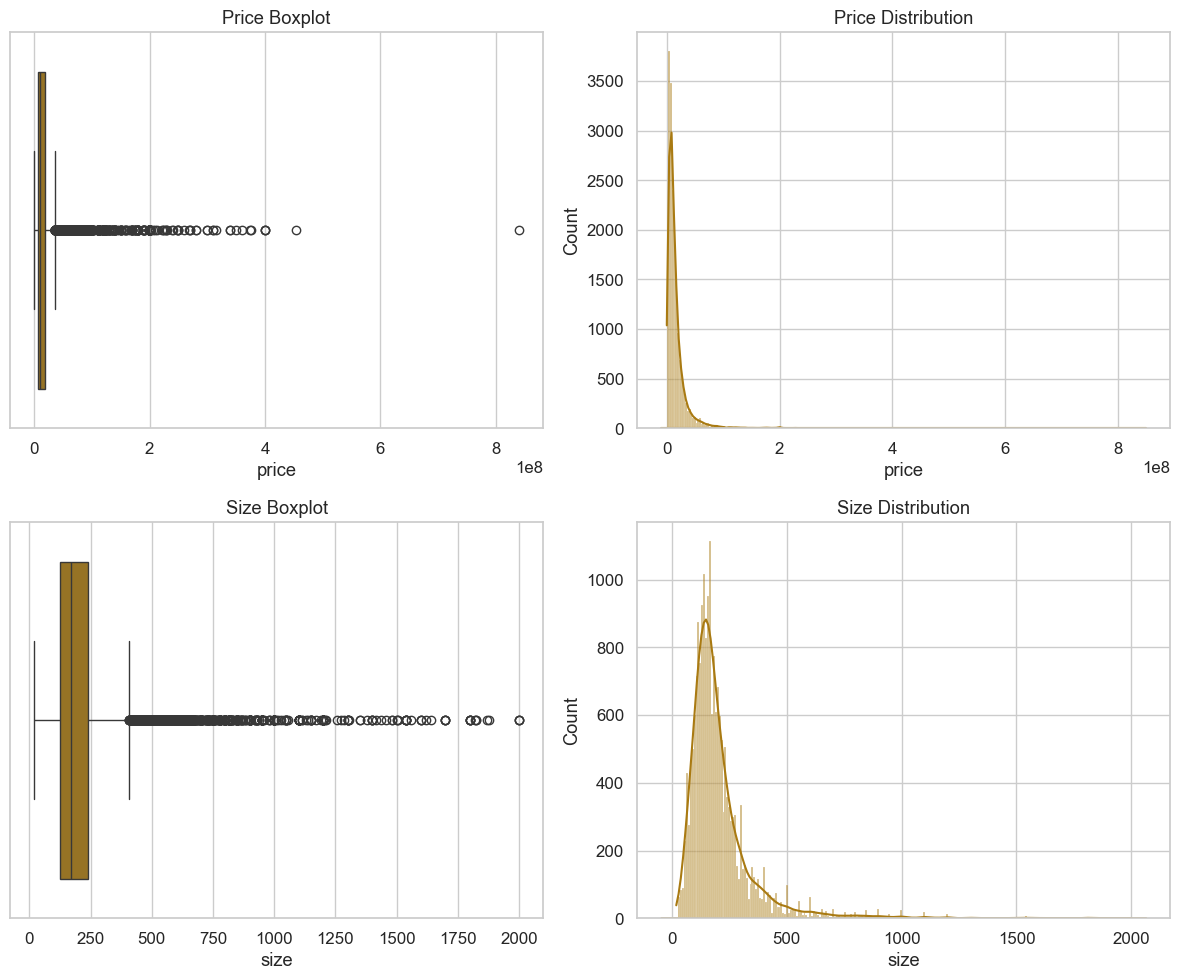

In [46]:
# Function for IQR outlier detection
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outlier summary for `{column}`:")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}\n")
    
    return outliers


# Detect outliers for price and size
outliers_price = detect_outliers_iqr(df, 'price')
outliers_size = detect_outliers_iqr(df, 'size')


# --------------------------
# Visualization with branding color
# --------------------------

brand_color = "#A97A12"   # Dark Goldenrod

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Price boxplot
sns.boxplot(x=df['price'], ax=axes[0, 0], color=brand_color)
axes[0, 0].set_title("Price Boxplot")

# Price histogram
sns.histplot(df['price'], kde=True, ax=axes[0, 1], color=brand_color)
sns.kdeplot(df['price'], ax=axes[0, 1], color=brand_color)
axes[0, 1].set_title("Price Distribution")

# Size boxplot
sns.boxplot(x=df['size'], ax=axes[1, 0], color=brand_color)
axes[1, 0].set_title("Size Boxplot")

# Size histogram
sns.histplot(df['size'], kde=True, ax=axes[1, 1], color=brand_color)
sns.kdeplot(df['size'], ax=axes[1, 1], color=brand_color)
axes[1, 1].set_title("Size Distribution")

plt.tight_layout()
plt.show()


___

## 8. Exploratory Data Analysis (Visualization & Relationships)

This is one of the most important stages of the project, where visualizations are used to uncover patterns, trends, and relationships within the data. EDA helps validate assumptions, highlight key drivers of property value, and reveal structure that may not be immediately visible through raw numbers.

The analysis is divided into two main parts:

- **Univariate Analysis**: Examines individual features to understand their distributions, central tendencies, and variability. This includes analyzing price ranges, size distributions, property types, and other single-variable characteristics.

- **Bivariate Analysis**: Explores relationships between variables, such as how price relates to size, how price per sqm differs by city or compound, and how property type affects pricing patterns. These comparisons help identify meaningful correlations and market dynamics.

This step provides the foundation for understanding the Egyptian real estate market and guides deeper insights throughout the project.


### 8.1 Univariate Analysis

The following features are analyzed:

- **Price distribution**
- **Size distribution**
- **Bedrooms distribution**
- **Bathrooms distribution**
- **Payment method counts**
- **Governorate counts**
- **Property type counts** (e.g., villa, chalet, apartment)


#### Histograms and Boxplots of:
- Price
- Size (sqm)
- Bedrooms
- Bathrooms

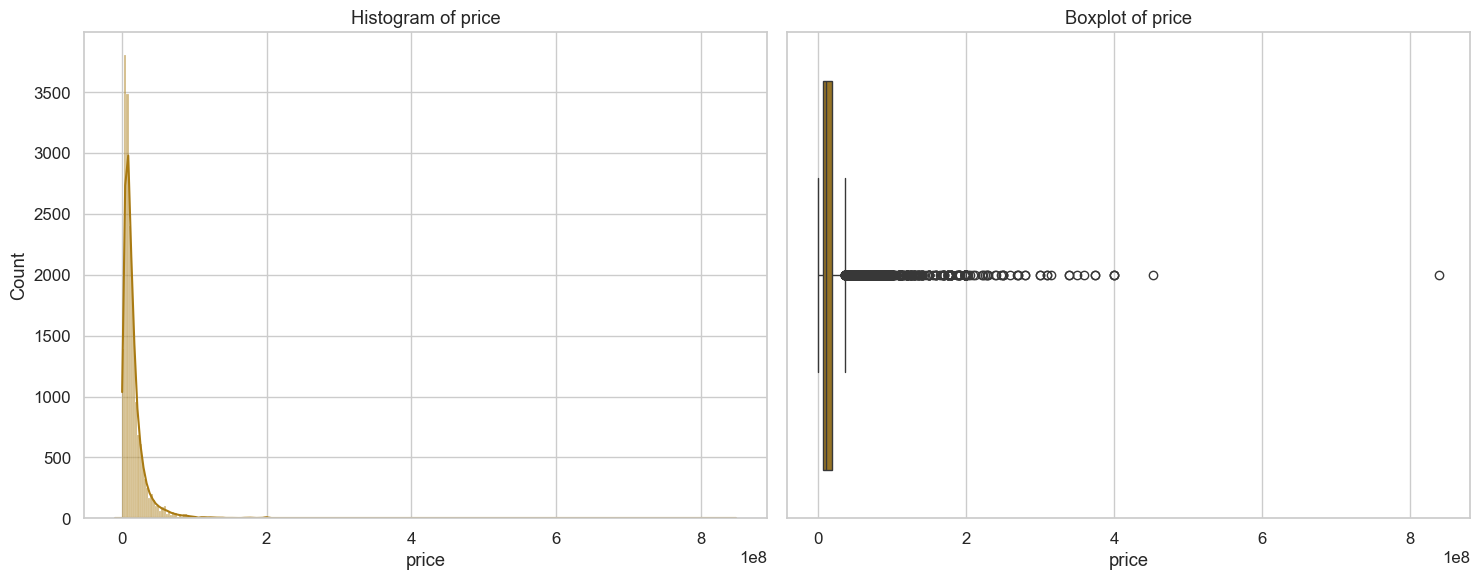

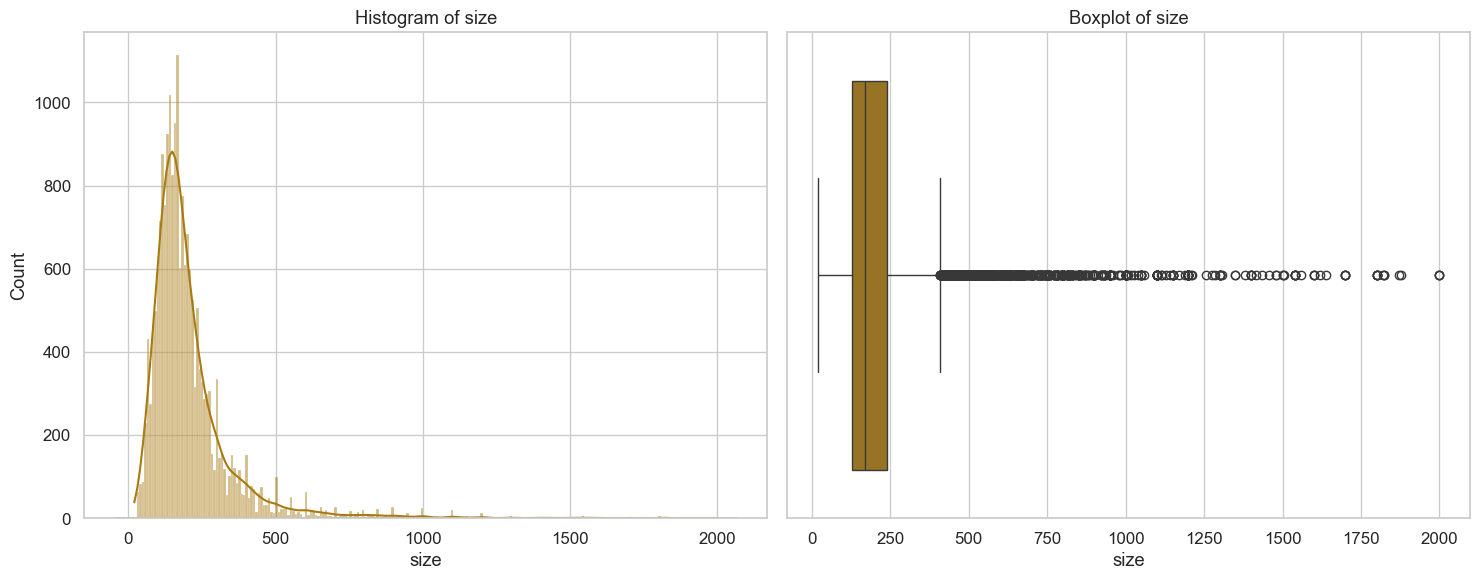

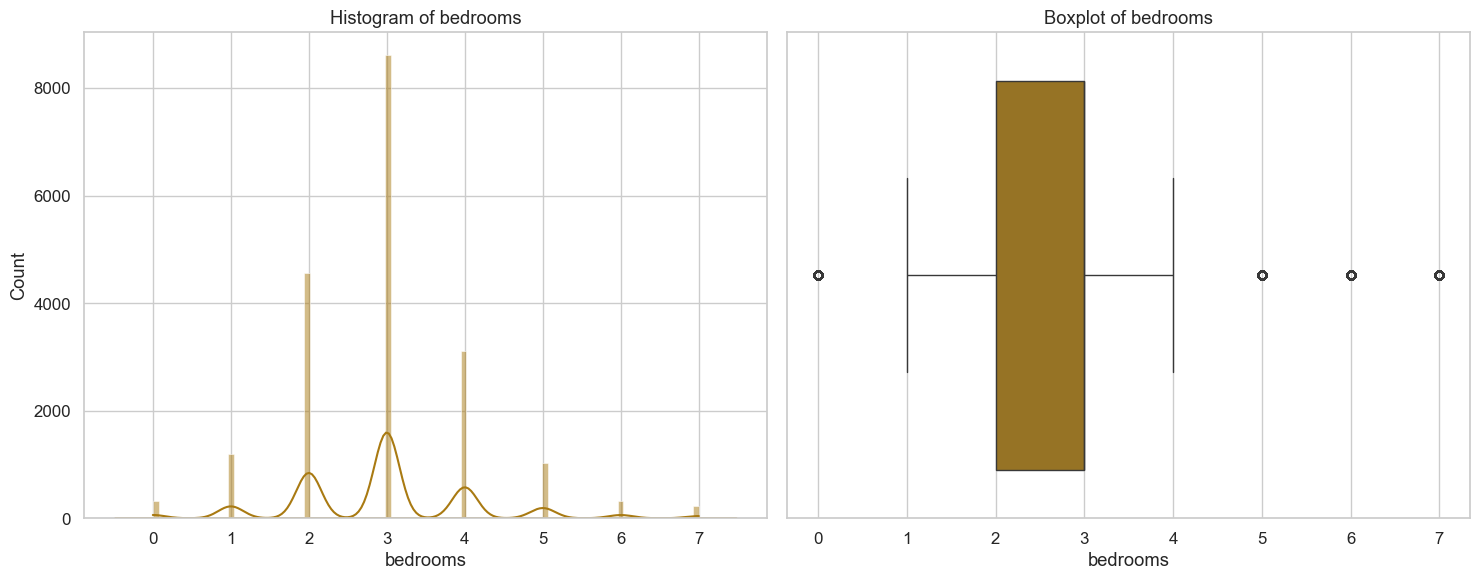

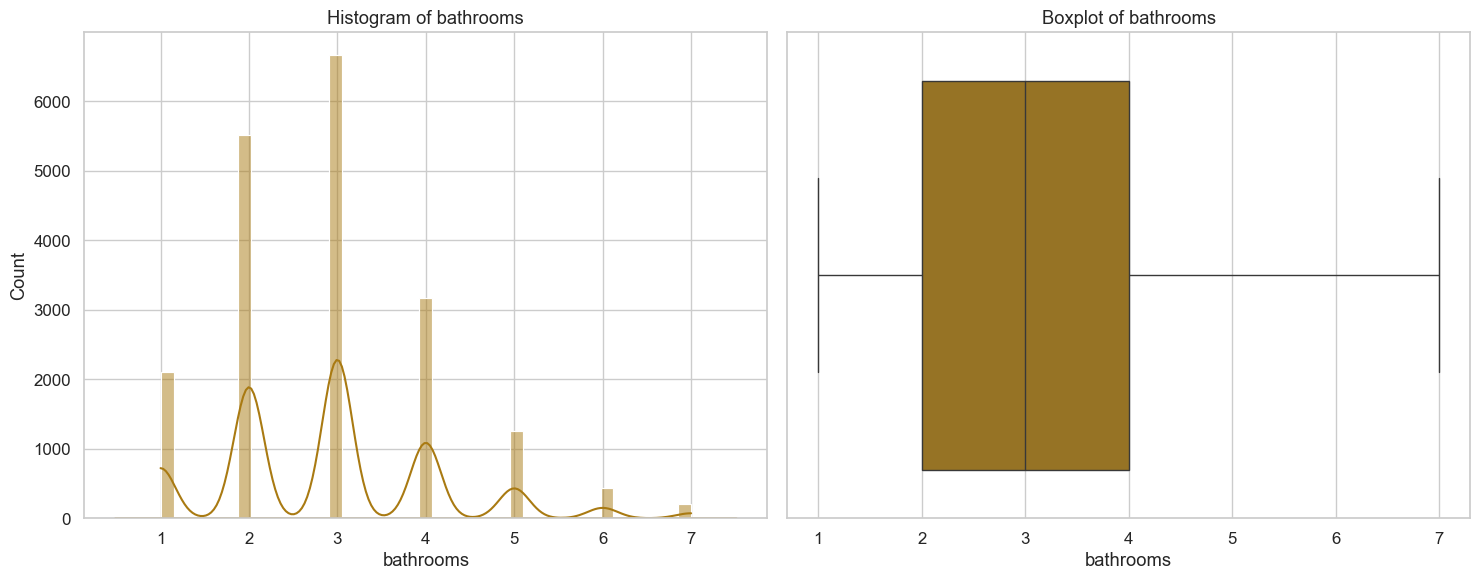

In [45]:
def plot_distribution(df, column):
    plt.figure(figsize=(15, 6))

    custom_color = "#A97A12"   # Dark Goldenrod

    # --- Histogram ---
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, color=custom_color, edgecolor=None)
    sns.kdeplot(df[column], color=custom_color)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    # --- Boxplot ---
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color=custom_color)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()


# Plot distributions for price, size, and bedrooms
plot_distribution(df, 'price')
plot_distribution(df, 'size')
plot_distribution(df, 'bedrooms')
plot_distribution(df, 'bathrooms')


**Price Insights**

- Price distribution is heavily right-skewed, with most properties clustered at lower prices.

- A large number of extreme outliers appear in the boxplot, indicating the presence of luxury units with very high prices.

- The long tail confirms a wide market range, from budget properties to ultra-luxury listings.

**Size Insights**

- Most properties fall between 100–250 sqm, forming a clear peak in that range.

- Size distribution is also right-skewed, with fewer very large units.

- The boxplot shows many high-size outliers, representing villas, palaces, or large compounds.

**Bedrooms Insights**

- Properties with 2 and 3 bedrooms dominate the dataset, with 3 being the peak.

- A few listings have 5–7 bedrooms, which appear as outliers in the boxplot.

- Very few properties have 0 bedrooms, likely representing studios.

**Bathrooms Insights**

- Most properties have 2–4 bathrooms, with 3 being the most common.

- The distribution is slightly right-skewed, with fewer high-bathroom properties (5–7).

- Boxplot shows a fair spread but no extreme outliers; higher bathroom counts represent premium properties.



#### Distribution of Categorical Features Barplots & Piecharts:
- Type (villa/chalet/apartment)
- Governorate
- Payment method


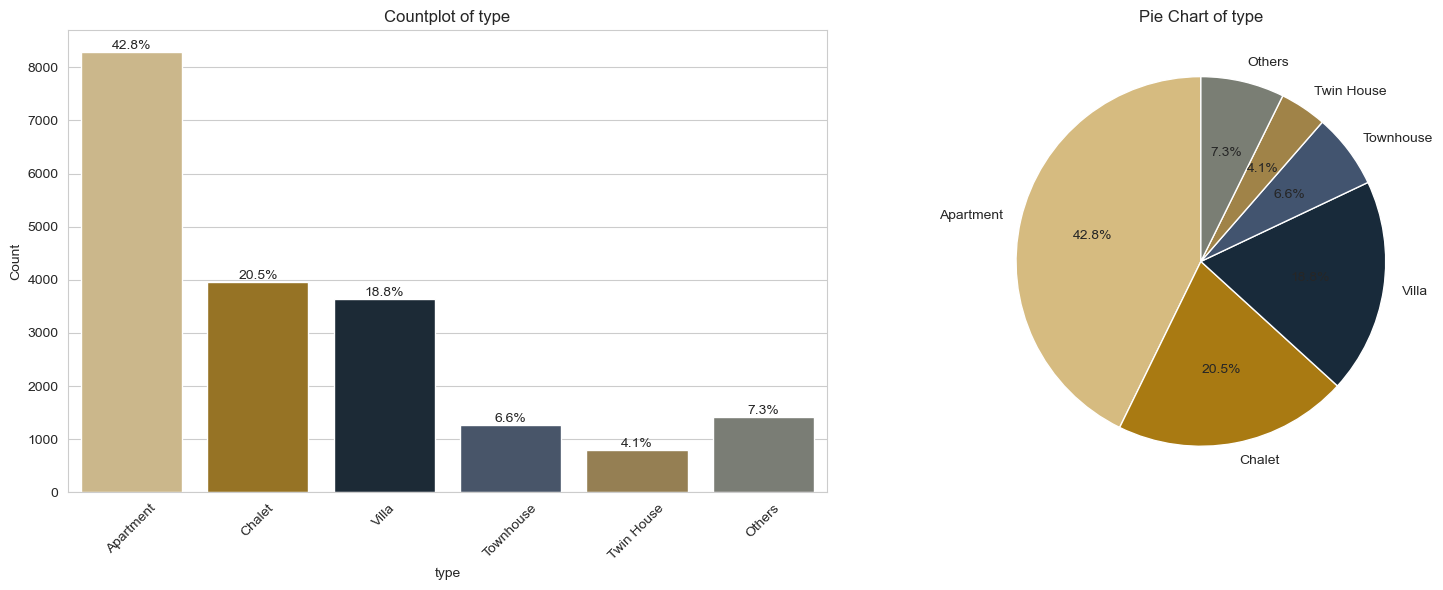

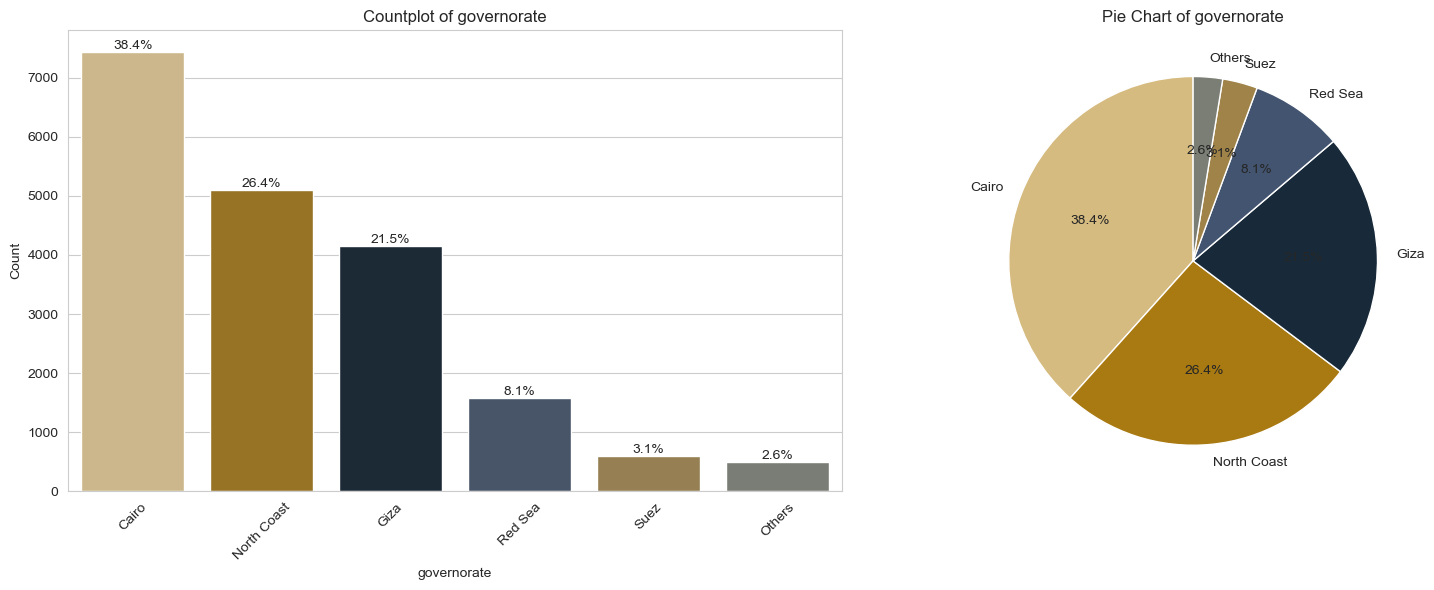

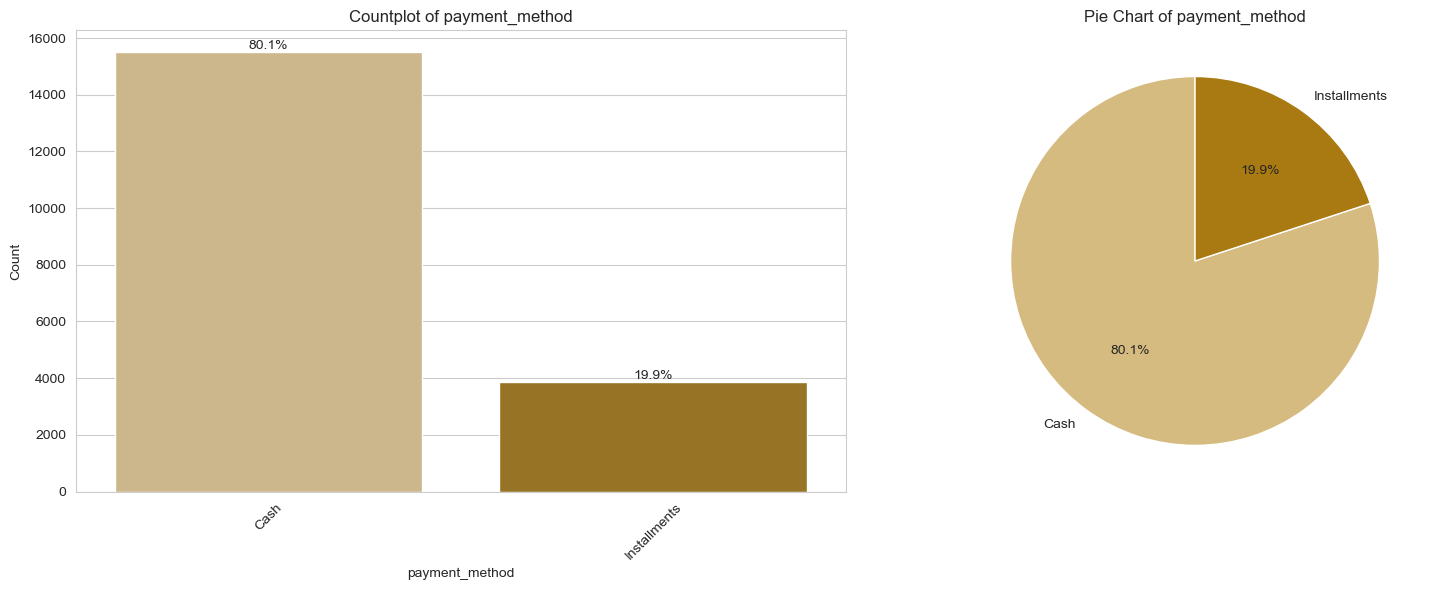

In [30]:
def plot_categorical(df, column):
    plt.figure(figsize=(16, 6))

    # Your custom real estate palette
    custom_colors = [
        "#D6BB80",  # Soft Fawn
        "#A97A12",  # Dark Goldenrod
        "#182A3A",  # Deep Space Blue
        "#42546F",  # Dusk Blue
        "#A08348",  # Dark Goldenrod (alt)
        "#7A7E74"   # Grey Olive
    ]

    # 1. Count values
    counts = df[column].value_counts()

    # 2. Top 5 categories + group the rest as "Others"
    top_counts = counts[:5]
    other_sum = counts[5:].sum()

    pie_data = top_counts.copy()
    if other_sum > 0:
        pie_data["Others"] = other_sum

    # 3. Filter df so rare categories = "Others"
    filtered_df = df.copy()
    filtered_df[column] = filtered_df[column].apply(
        lambda x: x if x in top_counts.index else "Others"
    )

    # 4. Ensure consistent order
    categories = list(pie_data.index)

    # 5. Map your custom colors to categories
    palette = {cat: custom_colors[i] for i, cat in enumerate(categories)}

    # ------------------ Countplot ------------------
    plt.subplot(1, 2, 1)
    ax = sns.countplot(
        data=filtered_df,
        x=column,
        hue=column,
        dodge=False,
        order=categories,
        palette=palette
    )

    # Remove legend (optional)
    if ax.legend_:
        ax.legend_.remove()

    plt.title(f"Countplot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add percentage labels
    total = len(filtered_df)
    for bar in ax.patches:
        height = bar.get_height()
        percent = (height / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{percent:.1f}%",
            ha='center',
            va='bottom',
            fontsize=10
        )

    # ------------------ Pie Chart ------------------
    plt.subplot(1, 2, 2)
    pie_data.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=[palette[cat] for cat in categories]
    )

    plt.title(f"Pie Chart of {column}")
    plt.ylabel("")

    plt.tight_layout()
    plt.show()


# Apply to your categorical columns
plot_categorical(df, 'type')
plot_categorical(df, 'governorate')
plot_categorical(df, 'payment_method')


**Property Type Distribution Insights**

- Apartments are the most common property type, representing 42.8% of all listings.

- Chalets (20.5%) and Villas (18.8%) follow, showing strong demand for both vacation and standalone residential units.

- Townhouses, Twin Houses, and Others account for smaller shares, indicating niche or less frequent property categories.

**Governorate Distribution Insights**

- Cairo dominates the listings, accounting for the largest share of properties (38.4%).

- North Coast (26.4%) and Giza (21.5%) also represent major real estate hubs.

- Regions like Red Sea, Suez, and Others contribute much smaller shares, indicating lower listing density.

**Payment Method Distribution Insights**

- The market is heavily driven by cash purchases, which make up 80.1% of all listings.

- Only 19.9% of properties are offered with installment payment options, suggesting that flexible financing is less common.


### 8.2 Bivariate Analysis

This step examines the relationships between pairs of variables to understand how different factors influence property prices and sizes. The following comparisons were included:

- **Average price by size category.**
- **Average price by number of bedrooms.**
- **Average price by number of bathrooms.**  
- **Average price by governorate.**  
- **Average price by property type.**  
- **Average price per sqm by governorate.**  
- **Average size by number of bedrooms.**  

In [ ]:
# Setting theme
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = (15, 6)

#### Average Price by Size Category

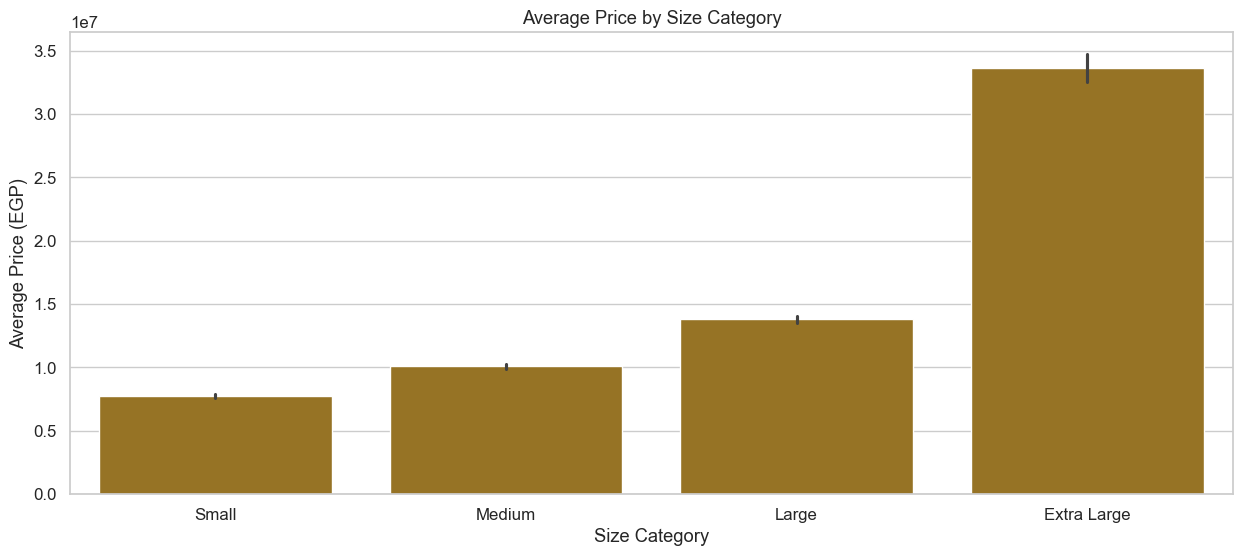

In [32]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='size_bin', y='price',color="#a97a12")
plt.title("Average Price by Size Category")
plt.xlabel("Size Category")
plt.ylabel("Average Price (EGP)")
plt.show()

**Insights:**

- Prices rise consistently as property size increases.

- Extra Large properties are significantly more expensive, indicating strong demand for high-space units.

#### Average Price by Bedrooms

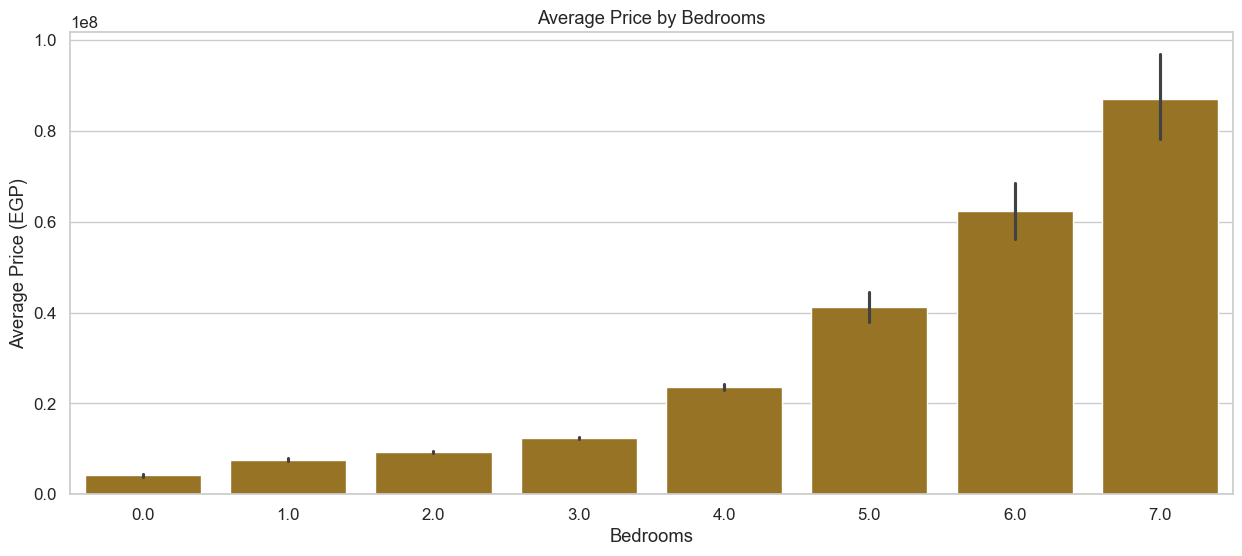

In [33]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='bedrooms', y='price',color="#a97a12")
plt.title("Average Price by Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price (EGP)")
plt.show()

**Insights:**
- There is a clear positive correlation between number of bedrooms and property price.

- Prices rise sharply from 4 bedrooms onward, reflecting the premium associated with larger residential units.

#### Average Price by Bathrooms

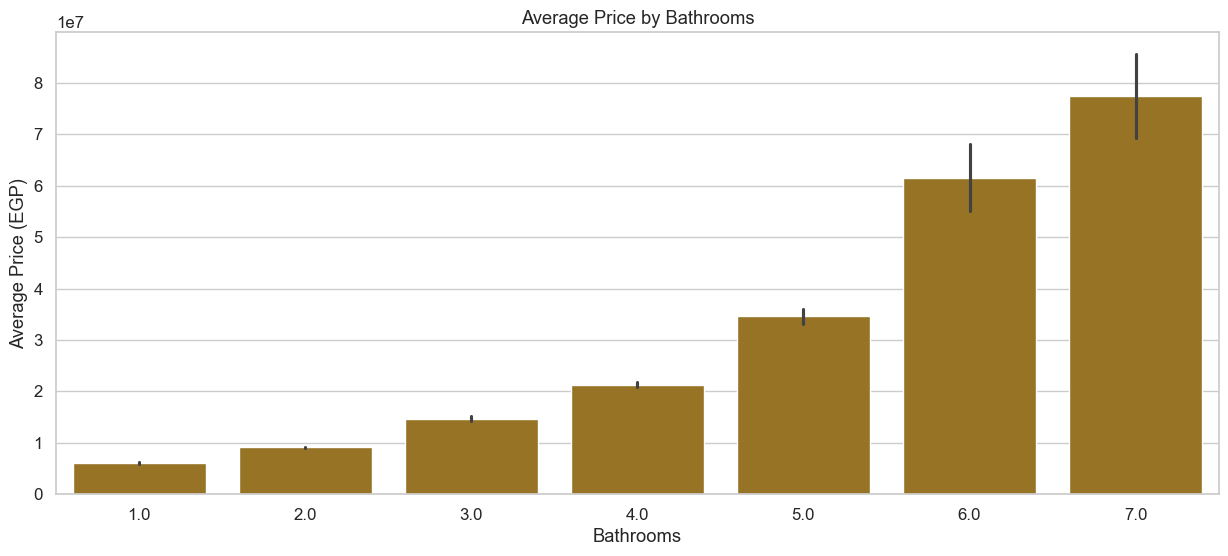

In [34]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='bathrooms', y='price',color="#a97a12")
plt.title("Average Price by Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Average Price (EGP)")
plt.show()

**Insights:**
- Properties with more bathrooms show a steady increase in price.

- A significant price jump begins at 5+ bathrooms, indicating these units belong to more luxurious or high-end property classes.

#### Average Price by Governate

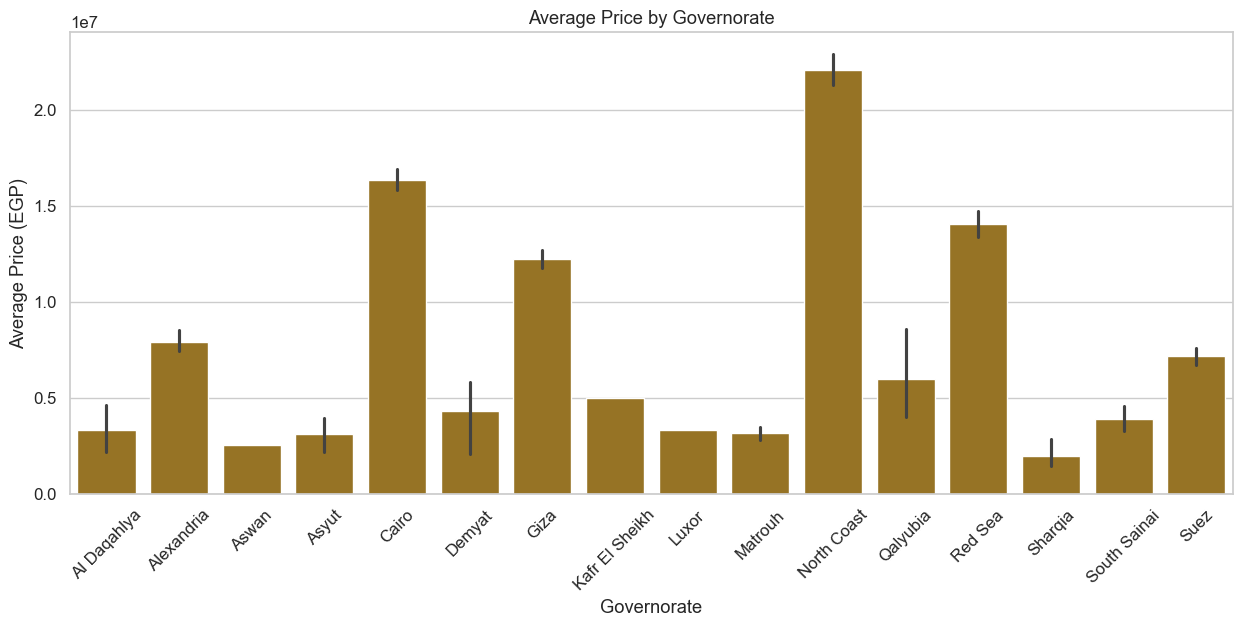

In [35]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='governorate', y='price',color="#a97a12")
plt.xticks(rotation=45)
plt.title("Average Price by Governorate")
plt.xlabel("Governorate")
plt.ylabel("Average Price (EGP)")
plt.show()

**Insights:**
- North Coast and Cairo have the highest average property prices.

- Governorates like Aswan, Luxor, and Sharqia show the lowest average prices, making them more affordable markets.

#### Average Price by Property Type

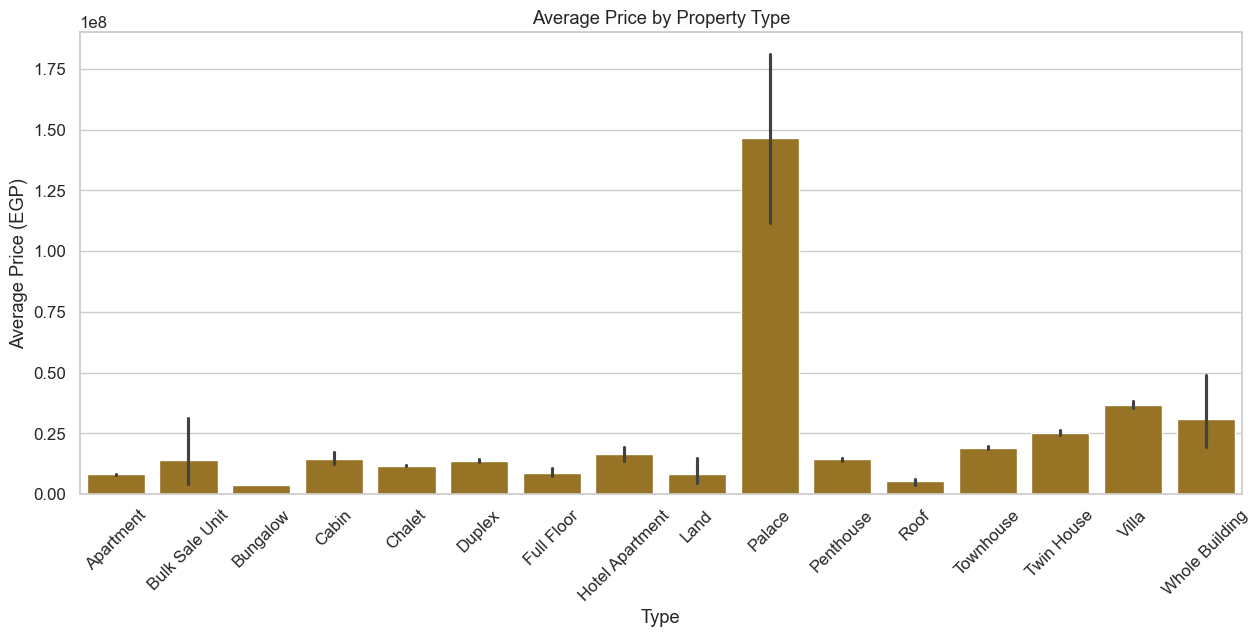

In [36]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='type', y='price',color="#a97a12")
plt.xticks(rotation=45)
plt.title("Average Price by Property Type")
plt.xlabel("Type")
plt.ylabel("Average Price (EGP)")
plt.show()

**Insights:**
- Palaces have the highest average prices by a wide margin.

- Villas, whole buildings, and penthouses also fall into higher-priced categories.

- More common property types like apartments, chalets, and cabins fall into lower price ranges.

#### Average Price per square meter by Governate

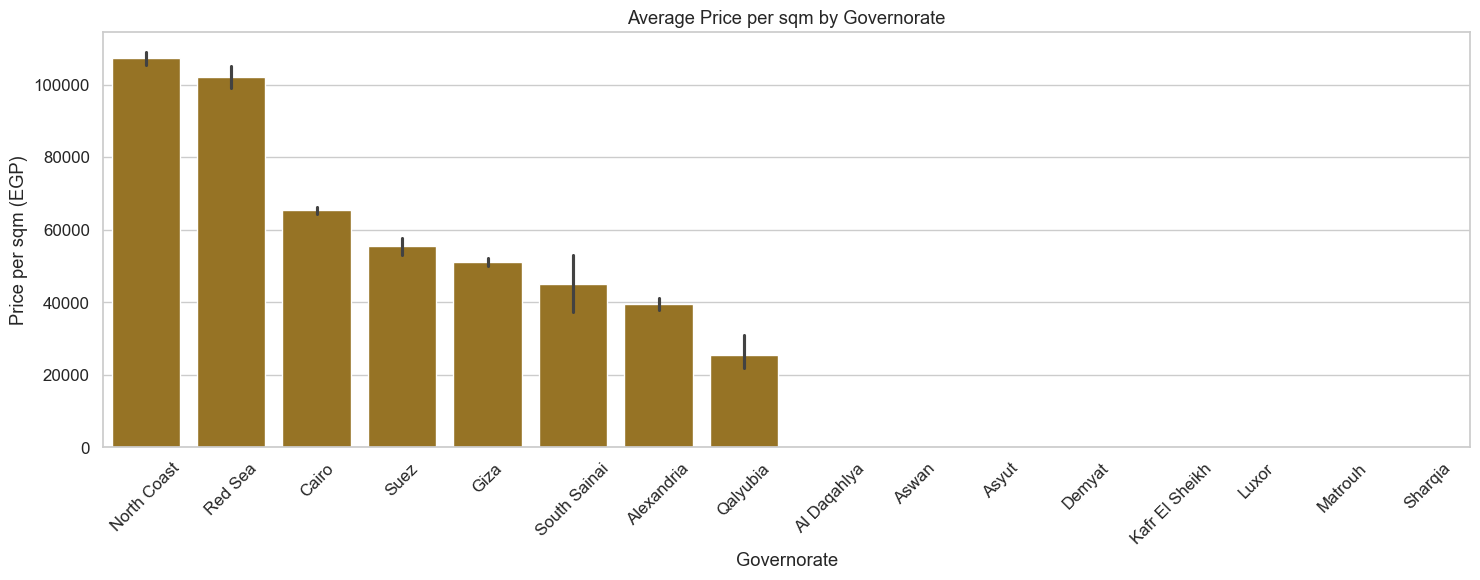

In [37]:
# Setting a minimum sample threshold to ensure reliability
min_samples = 15
gov_counts = df['governorate'].value_counts()
valid_govs = gov_counts[gov_counts >= min_samples].index
df_filtered = df[df['governorate'].isin(valid_govs)]

# Order governorates by average price per sqm
order = (
    df_filtered.groupby('governorate',observed=False)['price_per_sqm']
    .mean()
    .sort_values(ascending=False)
    .index
)


plt.figure(figsize=(15, 6))
sns.barplot(
    data=df_filtered,
    x='governorate',
    y='price_per_sqm',
    order=order,
    color="#a97a12"
)

plt.xticks(rotation=45)
plt.title("Average Price per sqm by Governorate")
plt.xlabel("Governorate")
plt.ylabel("Price per sqm (EGP)")
plt.tight_layout()
plt.show()


**Insights:**
- North Coast and Red Sea lead with the highest price per sqm, reflecting luxury coastal market demand.

- Qalyubia and Alexandria show the lowest price per sqm, offering more budget-friendly options.

#### Average Size by Bedrooms

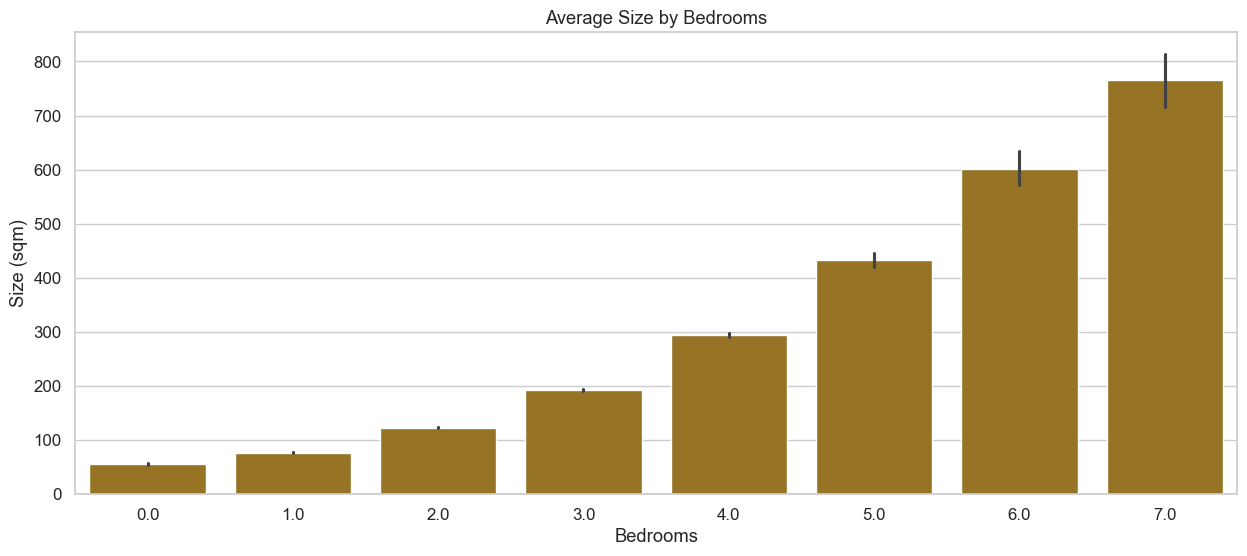

In [38]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='bedrooms', y='size',color="#a97a12")
plt.title("Average Size by Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Size (sqm)")
plt.show()

**Insights:**
- Property size scales directly with the number of bedrooms.

- A major increase occurs from 5 bedrooms onward, matching luxury villa-type property patterns.

#### Average Property Size by Governorate

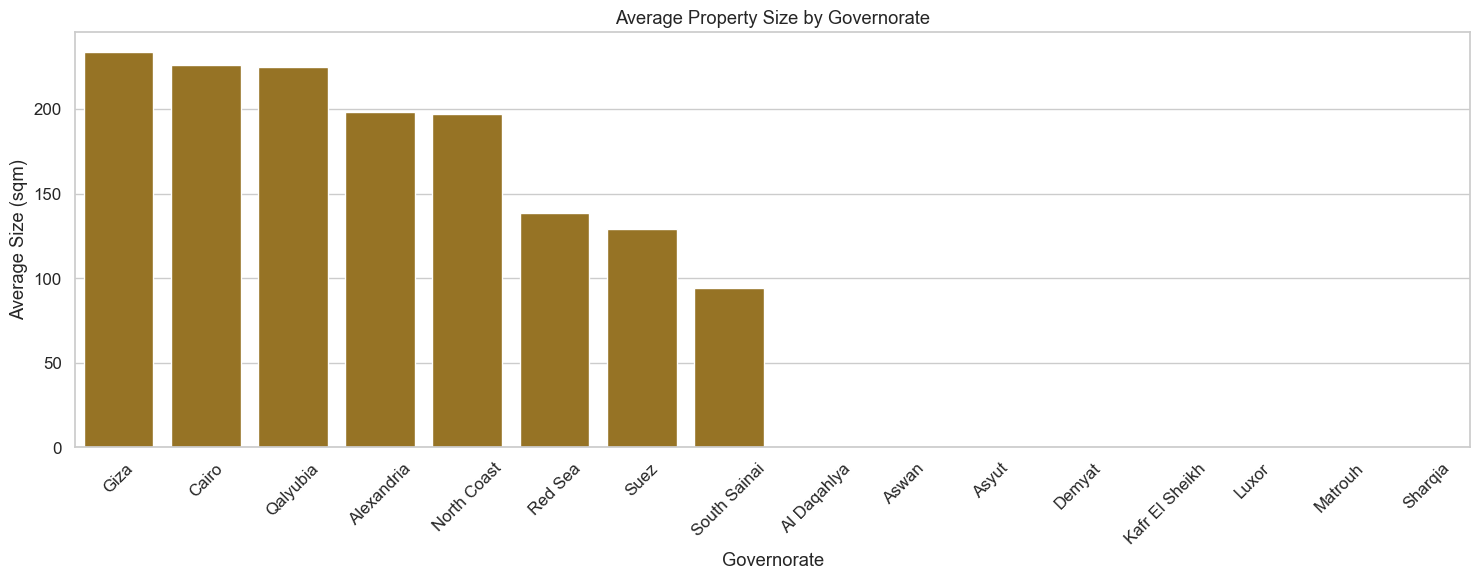

In [39]:
# Average Size by Governorate (with minimum sample threshold)
min_samples = 15
gov_counts = df['governorate'].value_counts()
valid_govs = gov_counts[gov_counts >= min_samples].index
df_filtered = df[df['governorate'].isin(valid_govs)]

gov_size = (
    df_filtered.groupby('governorate', observed=False)['size']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(15,6))
sns.barplot(
    x=gov_size.index,
    y=gov_size.values,
    color="#a97a12",
    order=gov_size.index
)
plt.xticks(rotation=45)
plt.title("Average Property Size by Governorate")
plt.xlabel("Governorate")
plt.ylabel("Average Size (sqm)")
plt.tight_layout()
plt.show()


**Insights:**
- Giza, Cairo, and Qalyubia offer the largest average property sizes.

- Coastal governorates like Red Sea and North Coast generally have smaller units, likely due to resort-style developments.

#### Most Affordable Governorates

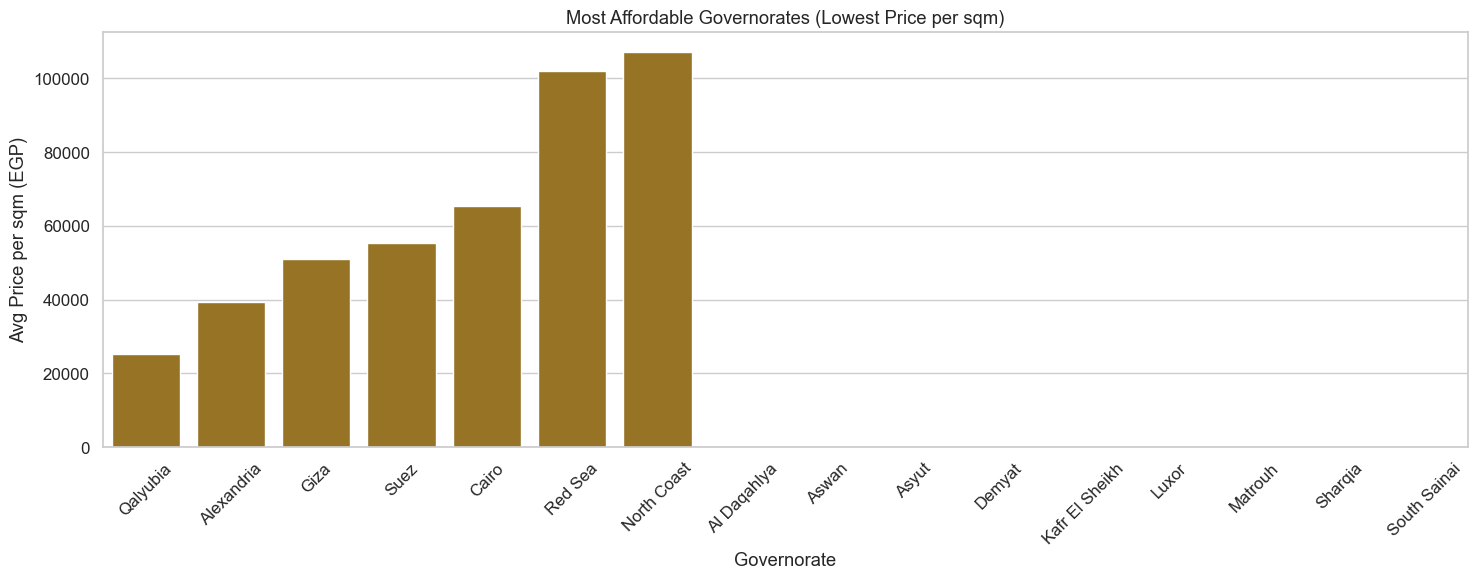

In [40]:
# Minimum number of listings required for a governorate to be included
min_samples = 30

# Count listings per governorate
gov_counts = df['governorate'].value_counts()

# Keep only governorates with enough data
valid_govs = gov_counts[gov_counts >= min_samples].index

# Filter the dataframe
df_filtered = df[df['governorate'].isin(valid_govs)]

# Compute affordability ranking (low → high)
gov_affordable = (
    df_filtered.groupby('governorate', observed=False)['price_per_sqm']
    .mean()
    .sort_values(ascending=True)
)

plt.figure(figsize=(15,6))
sns.barplot(
    x=gov_affordable.index,
    y=gov_affordable.values,
    order=gov_affordable.index,   # ← THIS SORTS THE BARS
    #color="#CCB974"
    color="#a97a12"
)

plt.xticks(rotation=45)
plt.title("Most Affordable Governorates (Lowest Price per sqm)")
plt.xlabel("Governorate")
plt.ylabel("Avg Price per sqm (EGP)")
plt.tight_layout()
plt.show()


**Insights:**
- Qalyubia, Alexandria, and Giza are the most affordable in terms of price per sqm.

- Moving toward Cairo, Red Sea, and North Coast, prices rise sharply, showing these regions cater to higher-income buyers.

#### Luxury Market Distribution

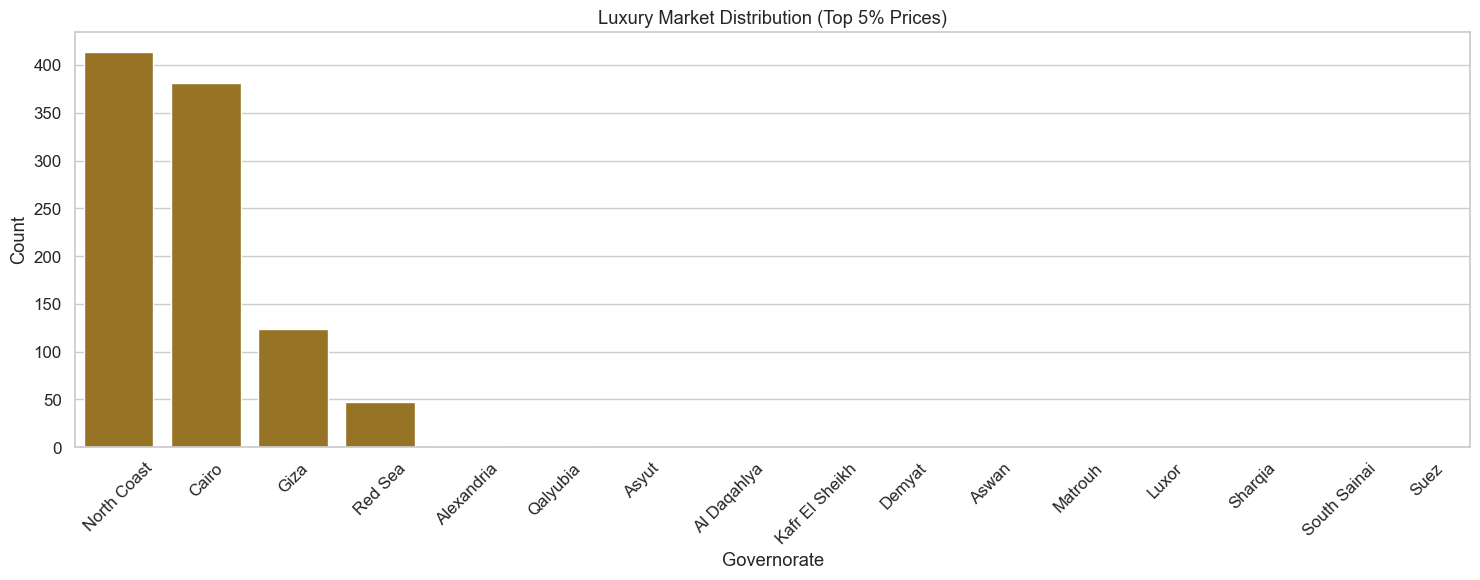

In [41]:
luxury_threshold = df['price'].quantile(0.95)
luxury_df = df[df['price'] >= luxury_threshold]

plt.figure(figsize=(15,6))
sns.countplot(
    data=luxury_df,
    x='governorate',
    order=luxury_df['governorate'].value_counts().index,
    color="#a97a12"
)
plt.xticks(rotation=45)
plt.title("Luxury Market Distribution (Top 5% Prices)")
plt.xlabel("Governorate")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Insights:**
- North Coast dominates the luxury market, followed by Cairo.

- Giza and the Red Sea contribute smaller shares, while most other governorates rarely appear in the top 5%.

#### Villa price per sqm by Governorate

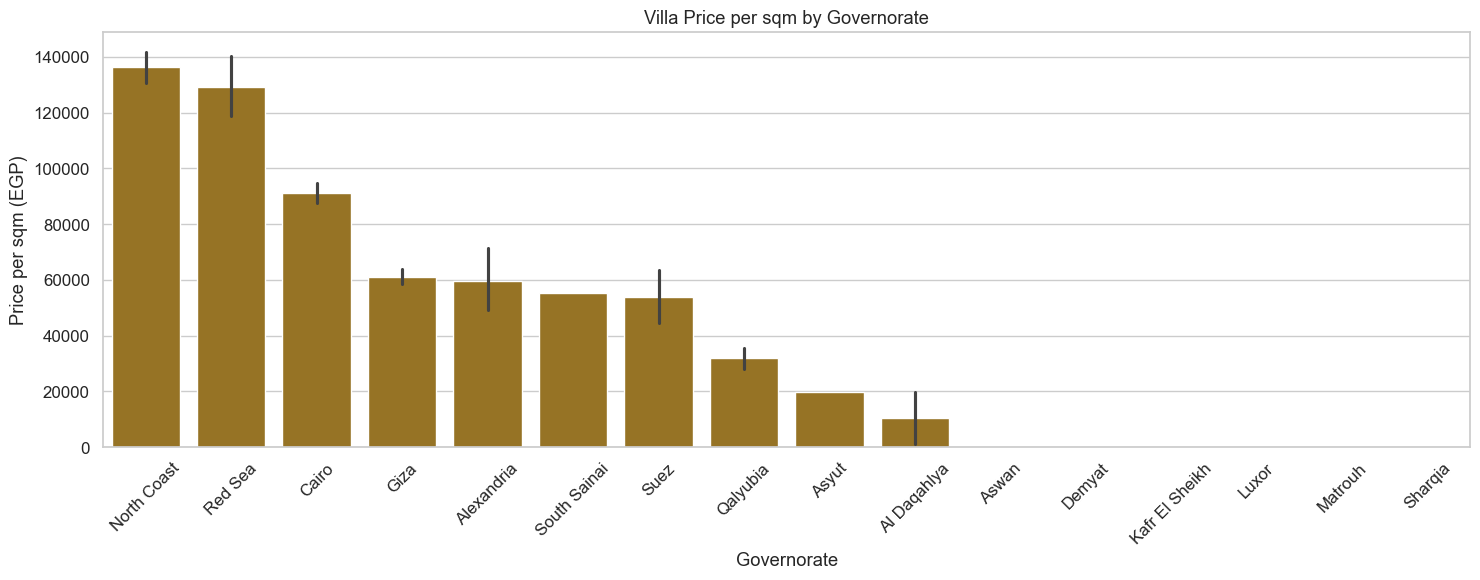

In [42]:
villas = df[df['type'] == "Villa"]

plt.figure(figsize=(15,6))
sns.barplot(
    data=villas,
    x='governorate',
    y='price_per_sqm',
    order=villas.groupby('governorate', observed=False)['price_per_sqm']
                .mean()
                .sort_values(ascending=False)
                .index,
    color="#a97a12"
)
plt.xticks(rotation=45)
plt.title("Villa Price per sqm by Governorate")
plt.xlabel("Governorate")
plt.ylabel("Price per sqm (EGP)")
plt.tight_layout()
plt.show()


**Insights:**
- North Coast and Red Sea have the highest villa price per sqm, reflecting strong demand in Egypt’s premium coastal villa market.

- Cairo also maintains high villa pricing, driven by urban luxury developments.

- Mid-range villa prices appear in Giza, Alexandria, South Sinai, and Suez.

- The most affordable villa sqm prices are found in Qalyubia, Asyut, and Al Daqahlya, indicating lower-cost villa markets.

### 8.3 Correlation Heatmap

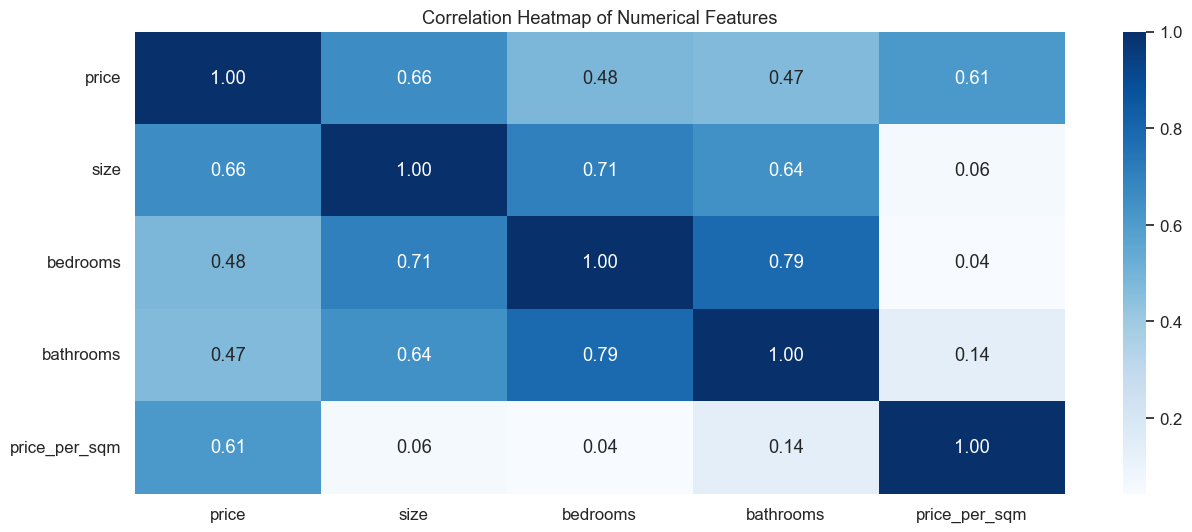

In [43]:
plt.figure(figsize=(15,6))
numeric_cols = ['price', 'size', 'bedrooms', 'bathrooms', 'price_per_sqm']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


#### **Correlation Insights**

Based on the correlation heatmap of numerical features, several key relationships emerge:

**1- Strong Relationship Between Size and Price:**
  - Size shows a strong positive correlation with price (0.66).
  - Larger properties tend to have higher absolute prices.

**2️-Bedrooms & Bathrooms Strongly Correlate With Size**
  - Bedrooms correlate 0.71 with size.
  - Bathrooms correlate 0.64 with size.
  - Both features scale naturally with property size, confirming structural consistency in the dataset.

**3- Price Correlates Moderately With Bedrooms and Bathrooms**
  - Price ↗ bedrooms: 0.48
  - Price ↗ bathrooms: 0.47
  - More rooms generally mean higher property value, but not as strongly as size.

**4️-Price per sqm is NOT correlated with size**
  - Correlation is very weak (0.06).
  - Price per sqm remains fairly stable regardless of how large the unit is.
  - This is typical in real estate: sqm price reflects location & quality more than total space.

**5️-Price per sqm moderately correlates with price**
  - Correlation is 0.61.
  - Expensive properties tend to also have higher price-per-sqm, indicating premium markets.

**6️-Bedrooms and Bathrooms are highly correlated**

  - Correlation is 0.79.
  - Properties with more bedrooms usually also have more bathrooms, which aligns with real estate design norms.

___

### 9. Exporting the Cleaned Dataset

After completing all cleaning, preprocessing, feature engineering, and analytical steps, the final dataset was exported following a reset of its indexes. This ensures a clean and structured version of the data is preserved for any future analysis or modeling tasks.

In [44]:
# Resetting index after all cleaning steps
df = df.reset_index(drop=True)

# Exporting cleaned dataset for further modeling
df.to_csv("data\\egypt_real_estate_listings_cleaned.csv", index=False)

___

## 10. Conclusion

This exploratory data analysis provided a comprehensive overview of the Egyptian real estate market, covering data cleaning, preprocessing, feature engineering, and detailed univariate and bivariate analyses. Through this process, we examined property characteristics, price patterns, market variability, and relationships between key features such as size, location, property type, and price per square meter.

The insights gained from this EDA highlight the diverse nature of the market, the impact of location and size on pricing, and the natural presence of high-value properties across premium areas. By preparing the dataset, optimizing memory usage, and exploring distributions and relationships, the analysis establishes a solid foundation for further in-depth studies, modeling, or decision-making.

This concludes the EDA phase of the project, providing a clear understanding of the data and the market it represents.
